##**ANÁLISIS EXPLORATORIO DE DATOS**

> **Proyecto No. 1**





*Juan Felipe Yepes*

*Jennifer Paola Sanchez*

*Linda Camila Castañeda*

###**Descripción de la Base de Datos**
######La fuente de información corresponde a *KAGGLE* que contiene diferentes bases de datos de dominio público y para este caso corresponde a las cifras del **World Happiness Report del año 2021** que se trata del noveno informe cuantitativo sobre la situación de la felicidad global relacionada con diferentes variables políticas, económicas, sociales y demográficas que los Gobiernos utilizan para informar sus decisiones de formulación de política pública y realizar mediciones del bienestar para evaluar el progreso de las naciones. Los informes revisan el estado de la felicidad en el mundo actual y muestran cómo la nueva ciencia de la felicidad explica las variaciones personales y nacionales. Para este reporte por medir un año atipico, se centraron en la relación entre el bienestar y covid-19 para la clasificación de los países y realizaron la comparación con los promedios de tres años anteriores.

---*La BD tiene una dimensión de 149 filas por 20 columnas.*

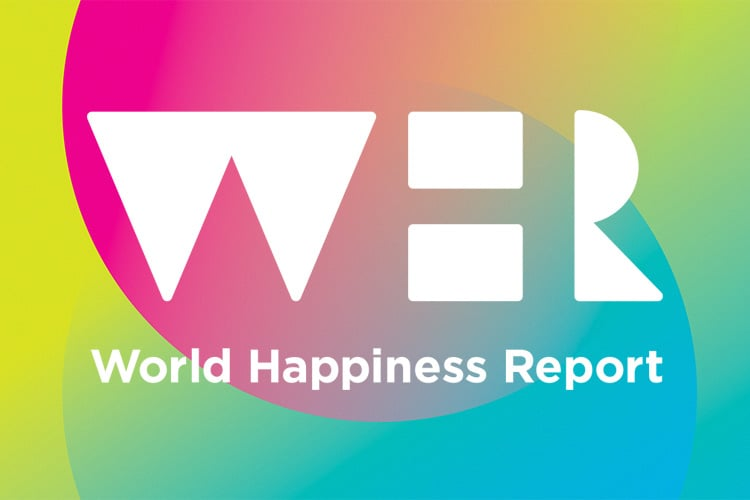

In [ ]:
import pandas as pd

In [ ]:
Felicidad_mundial = pd.read_excel("/content/world-happiness-report-2021 (1).xlsx")

In [ ]:
Felicidad_mundial

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


###**Tipo de Variables**

Contamos con un total de 20 variables, de las cuales dos son de tipo objeto, también llamadas string que corresponden al nombre del país y la región por continente, el resto de las variables son de tipo númerico (float). 

In [ ]:
Felicidad_mundial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

###**Valores**

In [ ]:
Felicidad_mundial.values

array([['Finland', 'Western Europe', 7.842, ..., 0.124, 0.481, 3.253],
       ['Denmark', 'Western Europe', 7.62, ..., 0.208, 0.485, 2.868],
       ['Switzerland', 'Western Europe', 7.571, ..., 0.204, 0.413, 2.839],
       ...,
       ['Rwanda', 'Sub-Saharan Africa', 3.415, ..., 0.227, 0.493, 1.095],
       ['Zimbabwe', 'Sub-Saharan Africa', 3.145, ..., 0.157, 0.075,
        1.205],
       ['Afghanistan', 'South Asia', 2.523, ..., 0.122, 0.01, 1.895]],
      dtype=object)

###**Columnas**
Las seis variables estudiadas para calcular el puntaje de felicidad están expresadas en coeficientes, índices o logaritmos. 

In [ ]:
Felicidad_mundial.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

###**Índices**

In [ ]:
Felicidad_mundial.index

RangeIndex(start=0, stop=149, step=1)

###**Variables descriptivas principales**
Aislamos del análisis los coeficientes secundarios "explained by" para enfocarnos en los seis factores que el estudio utiliza para determinar el puntaje
####*Análisis estadísticas descriptivas*
La percepción de felicidad se encuentra para 149 países. En la mayoría de los casos, los máximos de las variables duplican el mínimo, lo que da indicios de una gran brecha de bienestar entre las naciones. El puntaje máximo del índice de felicidad es de 7.842 para Finlandia, y el mínimo con 2.523 para Afghanistan. 

De manera general, las diferencias en la percepción de corrupción son muy marcadas, con un mínimo de 0.082, y un máximo de 0.939. Lo mismo sucede con la expectativa de vida, donde existe un mínimo de aproximadamente 48 años, el cuál podría reflejar deficiencias en salubridad, seguridad y en general, en condiciones de calidad de vida, y, por el contrario, un máximo de 76 años, aproximadamente. 



In [ ]:
Felicidad_mundial[['Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].describe()


,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


###**Ladder Score**


*Puntaje promedio ponderado de felicidad que contempla los siguientes seis factores (producción económica, apoyo social, esperanza de vida, libertad, ausencia de corrupción y generosidad)*

*Adicionalmente, está medida en una escala que va de 0 a 10 que se rastrea a lo largo del tiempo y se compara con otros países*

**Países involucrados**

La región que tiene mayor representación con respecto a número de países es África Subsahariana, y la de menor es la compuesta por America del Norte, Australia y Nueva Zelanda. 

In [ ]:
Paises_por_continente = Felicidad_mundial["Regional indicator"].value_counts()
Paises_por_continente

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Central and Eastern Europe            17
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

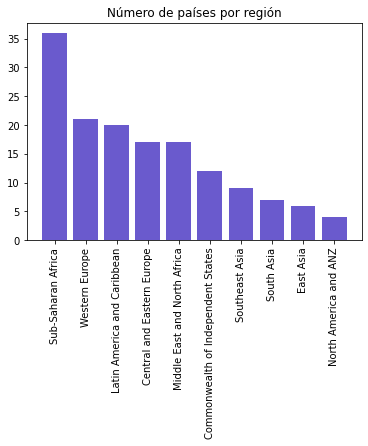

In [ ]:
fig, ax =plt.subplots()
ax.bar(Paises_por_continente.index, Paises_por_continente.values,
       color = "slateblue")
plt.xticks(rotation = 90)
ax.set_title("Número de países por región")
plt.show()


**Estadisticas descriptivas**

In [ ]:
import numpy as np

In [ ]:
Felicidad_mundial[["Ladder score"]].agg([min, max, np.mean, np.median])

,Ladder score
min,2.523000
max,7.842000
mean,5.532839
median,5.534000


Para el Ladder score, el mínimo corresponde a 2.523 (Afganistán), el máximo a 7.842 (Finlandia), una media de 5.532839 en el análisis de los 149 países, y una mediana de 5.534.

**Distribución**

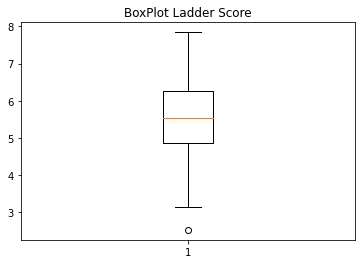

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(Felicidad_mundial["Ladder score"])
ax.set_title("BoxPlot Ladder Score")
plt.show()

La distribución del puntaje de felicidad evidencia un comportamiento normal, dado que la mediana esta en una posición central y, de igual forma, el rango intercuartil presenta un comportamiento normal. Por último, se evidencian muy pocos datos atípicos. 

**Ranking países**

###Las cinco primeras variables de la BD organizadas por Ladder score corresponden a países de Europa Occidental:
El ranking con los países con mayor percepción de felicidad cuenta con Finlandia que por cuarta vez consecutiva se posiciona en el primer lugar por contar con un nivel de vida alto, uno de los países con el mejor balance contra el covid e indices muy positivos en materia de solidaridad, lucha contra la pobreza y desigualdad, seguido por Dinamarca y Suiza en segundo y tercer lugar.


In [ ]:
Felicidad_mundial.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


####Cuatro de los cinco países con menor puntaje de felicidad pertenecen a la región de África Subsahariana:
En el último lugar encontramos a Afghanistán que se ha caracterizado por varias décadas por frecuentar guerrar y conflictos dentro de su Nación.

In [ ]:
Felicidad_mundial.tail()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


**Por Región - Continente**

Para cada región del continente encontramos a un país destacando su indicador de felicidad: para el caso de Europa Central y del Este está Republica Checa  

In [ ]:
Felicidad_mundial.groupby("Regional indicator")["Ladder score"].max()

Regional indicator
Central and Eastern Europe            6.965
Commonwealth of Independent States    6.179
East Asia                             6.584
Latin America and Caribbean           7.069
Middle East and North Africa          7.157
North America and ANZ                 7.277
South Asia                            5.269
Southeast Asia                        6.377
Sub-Saharan Africa                    6.049
Western Europe                        7.842
Name: Ladder score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

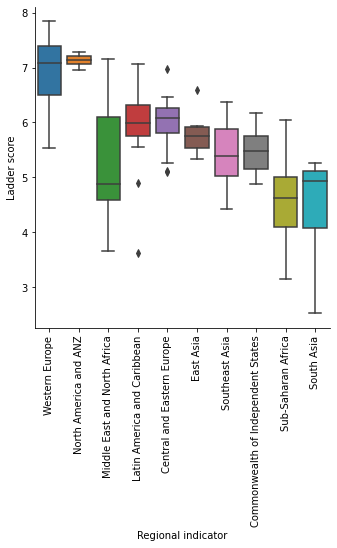

In [ ]:
sns.catplot("Regional indicator", "Ladder score", data = Felicidad_mundial, kind = "box")
plt.xticks(rotation = 90)
plt.plot()

Se puede evidenciar un comportamiento sumamente variable en las distribuciones del puntaje de felicidad a lo largo de las regiones estudiadas. Europa occidental y la región comprendida por Norteamérica, Australia y Nueva Zelanda, cuentan con una mediana del puntaje más elevada con respecto a las demás regiones. En las regiones de Latinoamérica y Europa Central y del Este se encuentran varios datos atípicos. 

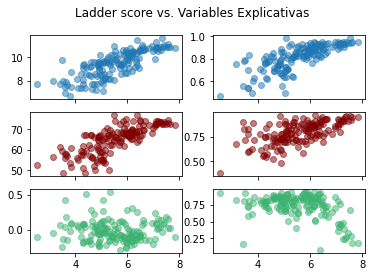

In [ ]:
fig, ax = plt.subplots(3,2, sharex = True, sharey = False)
ax[0, 0].scatter(Felicidad_mundial["Ladder score"], Felicidad_mundial["Logged GDP per capita"],
                 alpha = 0.5)
ax[0, 1].scatter(Felicidad_mundial["Ladder score"], Felicidad_mundial["Social support"],
                 alpha = 0.5)
ax[1, 0].scatter(Felicidad_mundial["Ladder score"], Felicidad_mundial["Healthy life expectancy"],
                 color = "maroon",alpha = 0.5)
ax[1, 1].scatter(Felicidad_mundial["Ladder score"], Felicidad_mundial["Freedom to make life choices"],
                 color = "maroon",alpha = 0.5)
ax[2, 0].scatter(Felicidad_mundial["Ladder score"], Felicidad_mundial["Generosity"],
                 color = "mediumseagreen",alpha = 0.5)
ax[2, 1].scatter(Felicidad_mundial["Ladder score"], Felicidad_mundial["Perceptions of corruption"],
                 color = "mediumseagreen",alpha = 0.5)
fig. suptitle("Ladder score vs. Variables Explicativas")

plt.show()

Para las variables Var. del PIB per capita, apoyo social, esperanza de vida saludable y libertad para tomar decisiones se denota una relación positiva con el incremento de felicidad. Esto quiere decir que ante un incremento de estas cuatro variables, se podrán evidenciar en mayor medida mejoras en el bienestar de los ciudadanos. Respecto a la Generosidad, no se aprecia un comportamiento con tendencia marcada por la dispersión propia de los datos. Finalmente, para el caso de la Corrupción, se evidencia una relación inversa contra el incremento de felicidad en los países. 





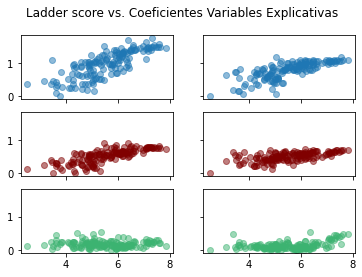

In [ ]:
fig, ax = plt.subplots(3,2, sharex = True, sharey = True)
ax[0, 0].scatter(Felicidad_mundial["Ladder score"], Felicidad_mundial["Explained by: Log GDP per capita"],
                 alpha = 0.5)
ax[0, 1].scatter(Felicidad_mundial["Ladder score"], Felicidad_mundial["Explained by: Social support"],
                 alpha = 0.5)
ax[1, 0].scatter(Felicidad_mundial["Ladder score"], Felicidad_mundial["Explained by: Healthy life expectancy"],
                 color = "maroon",alpha = 0.5)
ax[1, 1].scatter(Felicidad_mundial["Ladder score"], Felicidad_mundial["Explained by: Freedom to make life choices"],
                 color = "maroon",alpha = 0.5)
ax[2, 0].scatter(Felicidad_mundial["Ladder score"], Felicidad_mundial["Explained by: Generosity"],
                 color = "mediumseagreen",alpha = 0.5)
ax[2, 1].scatter(Felicidad_mundial["Ladder score"], Felicidad_mundial["Explained by: Perceptions of corruption"],
                 color = "mediumseagreen",alpha = 0.5)
fig. suptitle("Ladder score vs. Coeficientes Variables Explicativas")
plt.show()

En este grupo de subplots se evidencian tres comportamientos diferentes: para los coeficientes de las variables Var. del PIB per capita y apoyo social, se denota una relación positiva marcada, para los coeficientes de esperanza de vida saludable y libertad para tomar decisiones se denota una relación positiva pero con un comportamiento leve. Por último, para el coeficiente de Generosidad y percepción de corrupción se visualiza un comportamiento lineal sin ninguna tendencia marcada.



###**Análisis de Colombia**

In [ ]:
country_index = Felicidad_mundial.set_index(["Country name"])
country_index

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095


**Colombia** se posiciona en el puesto número 52 de 149 países con un puntaje de 6,012 y dentro del continente de LatinoAmérica y el Caribe se clasifica compo el décimo país más feliz, una posición intermedia dentro de 20 países. Las categorias que impulsan en mayor medida este resultado y su posición son las cuatro últimas referentes a esperanza de vida saludable, libertad de toma de decisiones, generosidad y percepción de corrupción (variable más crítica) dado que son las que cuentan con menor calificación e incluso con indices negativos.

Los analistas destacan un aspecto en particular que es el comportamiento que tuvó para el 2020 el mercado laboral en medio de la pandemia, Colombia se caracterizó por un alto desempleo y la frecuente inactividad laboral que superó las expectativas y por lo tanto, desfavorecio el resultado.

In [ ]:
country_index.loc["Colombia"]

Regional indicator                            Latin America and Caribbean
Ladder score                                                        6.012
Standard error of ladder score                                      0.061
upperwhisker                                                        6.132
lowerwhisker                                                        5.892
Logged GDP per capita                                               9.557
Social support                                                      0.847
Healthy life expectancy                                            68.001
Freedom to make life choices                                        0.837
Generosity                                                         -0.135
Perceptions of corruption                                           0.841
Ladder score in Dystopia                                             2.43
Explained by: Log GDP per capita                                    1.021
Explained by: Social support          

**Comparación con Latino América**

Si se comparan algunas de las naciones de LatinoAmérica, encontramos a Costa Rica en el primer lugar dentro de la región con un puntaje de 7,069 y a Haiti dentro de la lista llamada "coleros" junto con muchos de los países africanos con apenas un 3,953. Con un puntaje similar a Colombia se encuentra Argentina y Perú con 5,92 y 5,84 respectivamente.

Una característica común de todos los países es que su menor calificación está en la percepción de corrupción lo que refleja inconvenientes de poder o políticos dentro de cada gobierno de la región.

In [ ]:
paises_comparables = ["Colombia", "Argentina", "Costa Rica", "Haiti", "Mexico", "Peru"]

In [ ]:
country_index.loc[paises_comparables]

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,,
Colombia,Latin America and Caribbean,6.012,0.061,6.132,5.892,9.557,0.847,68.001,0.837,-0.135,0.841,2.43,1.021,0.866,0.615,0.554,0.100,0.063,2.794
Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,-0.182,0.834,2.43,1.162,0.980,0.646,0.544,0.069,0.067,2.461
Costa Rica,Latin America and Caribbean,7.069,0.056,7.179,6.960,9.880,0.891,71.400,0.934,-0.126,0.809,2.43,1.134,0.966,0.722,0.673,0.105,0.083,3.387
Haiti,Latin America and Caribbean,3.615,0.173,3.953,3.276,7.477,0.540,55.700,0.593,0.422,0.721,2.43,0.294,0.173,0.227,0.257,0.463,0.139,2.060
Mexico,Latin America and Caribbean,6.317,0.053,6.420,6.213,9.859,0.831,68.597,0.862,-0.147,0.799,2.43,1.126,0.830,0.634,0.585,0.092,0.089,2.961
Peru,Latin America and Caribbean,5.840,0.075,5.988,5.692,9.458,0.832,68.250,0.822,-0.154,0.891,2.43,0.986,0.833,0.623,0.536,0.087,0.031,2.744


###**PIB per cápita**
*Se toma a los ingresos como la obtención de riqueza que puede satisfacer necesidades o preferencias de los individuos y de esa manera incrementar su felicidad*

In [ ]:
media_latam = Felicidad_mundial[Felicidad_mundial["Regional indicator"] == "Latin America and Caribbean"]["Logged GDP per capita"].mean()
media_eastasia = Felicidad_mundial[Felicidad_mundial["Regional indicator"] == "East Asia"]["Logged GDP per capita"].mean() 
media_afrsub = Felicidad_mundial[Felicidad_mundial["Regional indicator"] == "Sub-Saharan Africa"]["Logged GDP per capita"].mean() 
media_centeasteur = Felicidad_mundial[Felicidad_mundial["Regional indicator"] == "Central and Eastern Europe"]["Logged GDP per capita"].mean() 
media_naanz = Felicidad_mundial[Felicidad_mundial["Regional indicator"] == "North America and ANZ"]["Logged GDP per capita"].mean() 

In [ ]:
print("El promedio de la variación porcentual del PIB per capita en Latinoamerica y el Caribe es", media_latam)
print("El promedio de la variación porcentual del PIB per capita en Asia del Este es", media_eastasia)
print("El promedio de la variación porcentual del PIB per capita en Africa Subsahariana", media_afrsub)
print("El promedio de la variación porcentual del PIB per capita en Europa central y del este es", media_centeasteur)
print("El promedio de la variación porcentual del PIB per capita en América del Norte, Australia y Nueva Zelanda es", media_naanz)

El promedio de la variación porcentual del PIB per capita en Latinoamerica y el Caribe es 9.370000000000001
El promedio de la variación porcentual del PIB per capita en Asia del Este es 10.367666666666667
El promedio de la variación porcentual del PIB per capita en Africa Subsahariana 8.075194444444442
El promedio de la variación porcentual del PIB per capita en Europa central y del este es 10.109058823529413
El promedio de la variación porcentual del PIB per capita en América del Norte, Australia y Nueva Zelanda es 10.8095


A partir de la obtención de las medias de las variaciones del pib per cápita por continente, es posible apreciar que los países de América del Norte, Australia, Nueva Zelanda, Asia del Este y Europa Central y del Este, cuentan con valores superiores a 10.0. La regiones Latinoamérica y África Subsahariana están un poco rezagadas en este valor, lo cual es económicamente intuitivo, ya que la mayoría de países de estas regiones no cuentan con economías tan fortalecidas o desarrolladas como las de las otras regiones. 

In [ ]:
import matplotlib.pyplot as plt

Uno de los aspectos que más impulsa la felicidad de los individuos es la riqueza. Este hecho se puede ver evidenciado en la siguiente gráfica, donde existe una relación directa entre el puntaje de felicidad y la variación en el PIB per cápita. 

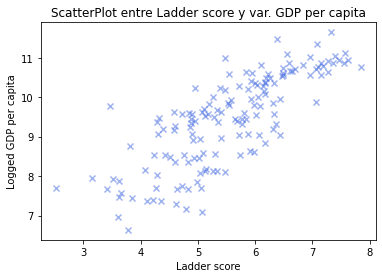

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Felicidad_mundial["Ladder score"], Felicidad_mundial["Logged GDP per capita"],
           marker = "x", color = "royalblue", alpha = 0.5)
ax.set_xlabel("Ladder score")
ax.set_ylabel("Logged GDP per capita")
ax.set_title("ScatterPlot entre Ladder score y var. GDP per capita")
plt.show()

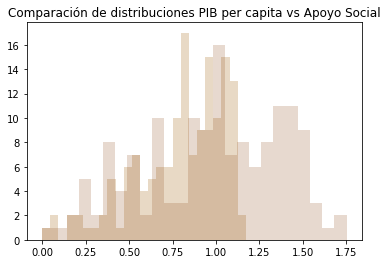

In [ ]:
fig, ax = plt.subplots()
ax.hist(Felicidad_mundial["Explained by: Social support"], bins = 25, alpha = 0.5, color = "tan")
ax.hist(Felicidad_mundial["Explained by: Log GDP per capita"], bins = 25, alpha = 0.2, color = "saddlebrown")
ax.set_title("Comparación de distribuciones PIB per capita vs Apoyo Social")
plt.show()

En esta comparación de distribuciones se puede apreciar que el PIB per capita tiene una mayor dispersión en su distribución respecto a la distribución de Apoyo Social, que llega a un máximo de 1.20, aproximadamente. Eso refleja que el PIB per cápita cuenta con una mayor representación en la explicación del incremento de la felicidad en los diferentes países. 

###**Percepción de Corrupción**
*Se refiere a la ausencia de corrupción en el gobierno y las empresas percibida por los ciudadanos*

Esta es una de las variables políticas de nuestro mayor interés, por lo cuál filtramos los 10 países con mayor percepción de corrupción en la base de datos encontrando que 6 de estos 10 países pertenecen a Europa Central o del Este.

In [ ]:
Felicidad_mundial.sort_values("Perceptions of corruption", ascending = False).head(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
59,Croatia,Central and Eastern Europe,5.882,0.048,5.975,5.788,10.217,0.924,70.799,0.754,-0.118,0.939,2.43,1.251,1.039,0.703,0.453,0.111,0.000,2.325
45,Romania,Central and Eastern Europe,6.140,0.057,6.253,6.027,10.284,0.832,67.355,0.845,-0.219,0.938,2.43,1.275,0.832,0.595,0.564,0.045,0.001,2.830
87,Bulgaria,Central and Eastern Europe,5.266,0.054,5.371,5.160,10.016,0.931,67.000,0.788,-0.096,0.932,2.43,1.181,1.055,0.583,0.494,0.125,0.005,1.823
63,Bosnia and Herzegovina,Central and Eastern Europe,5.813,0.050,5.911,5.715,9.590,0.870,68.098,0.706,0.113,0.931,2.43,1.032,0.919,0.618,0.395,0.261,0.005,2.583
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895
109,Ukraine,Commonwealth of Independent States,4.875,0.052,4.977,4.773,9.436,0.888,64.902,0.724,-0.011,0.924,2.43,0.979,0.958,0.517,0.417,0.181,0.010,1.813
64,Moldova,Commonwealth of Independent States,5.766,0.046,5.856,5.677,9.454,0.857,65.699,0.822,-0.079,0.918,2.43,0.985,0.888,0.542,0.536,0.137,0.013,2.665
32,Kosovo,Central and Eastern Europe,6.372,0.059,6.487,6.257,9.318,0.821,63.813,0.869,0.257,0.917,2.43,0.937,0.807,0.483,0.593,0.356,0.014,3.182
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
33,Slovakia,Central and Eastern Europe,6.331,0.041,6.411,6.251,10.369,0.936,69.201,0.766,-0.124,0.911,2.43,1.304,1.066,0.653,0.468,0.107,0.018,2.714


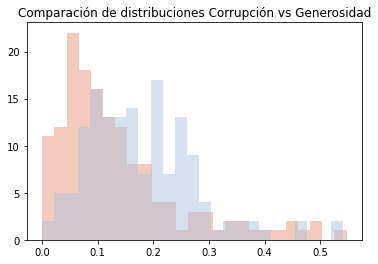

In [ ]:
fig, ax = plt.subplots()
ax.hist(Felicidad_mundial["Explained by: Perceptions of corruption"], bins = 25, alpha = 0.5, color = "darksalmon")
ax.hist(Felicidad_mundial["Explained by: Generosity"], bins = 25, alpha = 0.5, color = "lightsteelblue")
ax.set_title("Comparación de distribuciones Corrupción vs Generosidad")
plt.show()

En esta comparación de distribuciones se puede apreciar que los valores de la variable Corrupción tienen un mayor sesgo en su distribución hacia la izquierda respecto a la distribución de Generosidad, lo cual refleja que la percecpción de corrupción podría contar con una menor representación en la explicación del incremento de la felicidad en los diferentes países. 

In [ ]:
import seaborn as sns

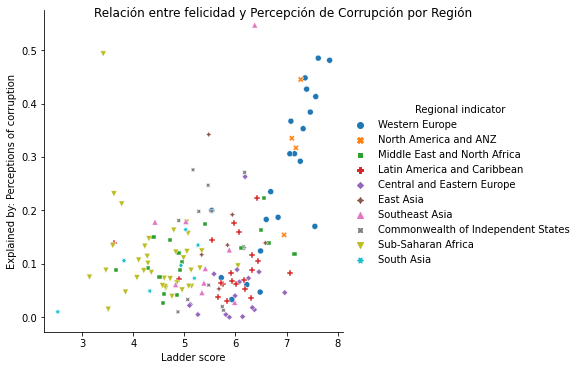

In [ ]:
f = sns.relplot(x = "Ladder score", y = "Explained by: Perceptions of corruption", 
                data = Felicidad_mundial,
                kind = "scatter",
                style = "Regional indicator",
                hue = "Regional indicator")
f.fig.suptitle("Relación entre felicidad y Percepción de Corrupción por Región")
plt.show()

De forma general, los países de todas las regiones se concentran en cúmulos, lo cual denota cierta similitud en su respectiva relación entre felicidad y percepción de corrupción. Por el contrario, los países de europa occidental demuestran una dispersión de los datos. Para la gran mayoría de las regiones, existen ciertos datos atípicos muy alejados de las concentraciones, como es el caso de un país del África Subsahariana (parte superior izquierda). 

###**Experanza de vida Saludable**
*Estado del sistema de salud en cobertura y calidad, bienestar fisico y condiciones de vida de los ciudadanos que se catalogan como saludables*


In [ ]:
Felicidad_mundial[(Felicidad_mundial["Healthy life expectancy"] > 68) & (Felicidad_mundial["Regional indicator"] == "Latin America and Caribbean")].sort_values("Healthy life expectancy", ascending = False).head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
15,Costa Rica,Latin America and Caribbean,7.069,0.056,7.179,6.960,9.880,0.891,71.400,0.934,-0.126,0.809,2.43,1.134,0.966,0.722,0.673,0.105,0.083,3.387
42,Chile,Latin America and Caribbean,6.172,0.046,6.262,6.081,10.071,0.882,70.000,0.742,-0.044,0.830,2.43,1.200,0.946,0.678,0.438,0.159,0.070,2.682
40,Panama,Latin America and Caribbean,6.180,0.073,6.323,6.036,10.350,0.896,69.652,0.872,-0.166,0.856,2.43,1.298,0.976,0.667,0.596,0.079,0.053,2.509
30,Uruguay,Latin America and Caribbean,6.431,0.046,6.521,6.341,9.966,0.925,69.100,0.896,-0.092,0.590,2.43,1.164,1.042,0.649,0.625,0.128,0.223,2.600
56,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,-0.182,0.834,2.43,1.162,0.980,0.646,0.544,0.069,0.067,2.461


Los 5 países latinoamericanos con mayor esperanza de vida saludable corresponden a **Costa Rica**, **Chile**, **Panamá**, **Uruguay** y **Argentina**. Esto sigue la línea de reportes sobre expectativa y calidad de vida que también sitúan a Costa Rica y a Chile como los países líderes a nivel latinoamérica en estos rubros, particularmente por sus fortalezas en salud, seguridad y educación.

Este ranking reaizado sobre esperanza de vida saludable no concuerda necesariamente con el puesto del país según el Ladder score, debido a que países como Uruguay (30), que aunque no ostentan el primer lugar en la región para dicho rubro, si cuentan con valores altos en apoyo social (0.925), y otros valores bastante favorables en percepción de corrupción (0.590), lo cual lo sitúa por encima de Chile (42) y Panamá (40) en el ranking total. 

In [ ]:
region_ind = Felicidad_mundial.groupby("Regional indicator")["Healthy life expectancy"].mean()
region_ind

Regional indicator
Central and Eastern Europe            68.338412
Commonwealth of Independent States    65.009500
East Asia                             71.252167
Latin America and Caribbean           67.076050
Middle East and North Africa          65.609118
North America and ANZ                 72.325000
South Asia                            62.681000
Southeast Asia                        64.888444
Sub-Saharan Africa                    55.886472
Western Europe                        73.033095
Name: Healthy life expectancy, dtype: float64

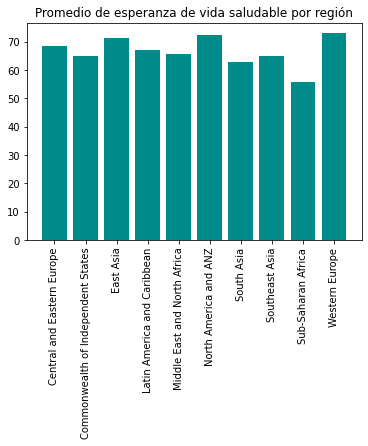

In [ ]:
fig, ax =plt.subplots()
ax.bar(region_ind.index, region_ind.values,
       color = "darkcyan")
plt.xticks(rotation = 90)
ax.set_title("Promedio de esperanza de vida saludable por región")
plt.show()


Las regiones con el mayor promedio de esperanza de vida saludables son: Europa Occidental, Norteamérica, Australia y Nueva Zelanda, y Asia del Este. La región que menor esperanza de vida saludable registra es África Subsahariana, lo cual refleja un sistema de salud y condiciones de calidad de vida precarias. 

###**Apoyo Social**
*Medido por tener un circulo social con quien contar en tiempos de problemas*

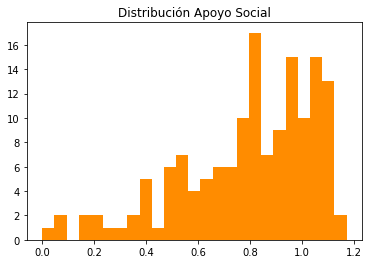

In [ ]:
fig, ax = plt.subplots()
ax.hist(Felicidad_mundial["Explained by: Social support"], color = "darkorange", bins = 25)
ax.set_title("Distribución Apoyo Social")
plt.show()

Es posible apreciar un sesgo hacia la derecha en la distribución de los valores de la variable Apoyo Social. Esto implica que la concentración de los datos se sitúan, en su mayoría, entre 0.8 y 1.1, lo cual quiere decir que la mayoría de los países tienen circulos sociales e institucionales consolidados. 

###**Generosidad**
*Existen estudios que destacan la importancia que tienen las relaciones sociales caracterizadas por la confianza, la generosidad y la identidad social compartida, en el nivel de felicidad. Por lo que, si los estados quieren contribuir a la felicidad de sus ciudadanos deben procurar que las políticas se diseñen y se ejecuten en forma que protejan e enriquezcan esos valores sociales*

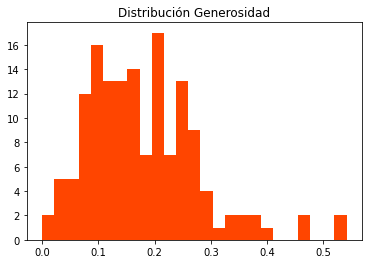

In [ ]:
fig, ax = plt.subplots()
ax.hist(Felicidad_mundial["Explained by: Generosity"], color = "orangered", bins = 25)
ax.set_title("Distribución Generosidad")
plt.show()

Es posible apreciar un sesgo en los valores de la variable Generosidad hacia la izquierda, lo cual implica que en la mayoría de países no se inculca una cultura que priorice y prolifere valores sociales. 

###**Libertad para toma de decisiones**
*Que cada individuo tenga la capacidad de autonomía e independencia para tomar sus propias decisiones, sin la interferencia de otros individuos e instituciones.*

In [ ]:
Felicidad_mundial[(Felicidad_mundial["Freedom to make life choices"] > 0.5) & (Felicidad_mundial["Regional indicator"] == "East Asia")].sort_values("Freedom to make life choices").head(3)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
61,South Korea,East Asia,5.845,0.042,5.928,5.763,10.651,0.799,73.90,0.672,-0.083,0.727,2.43,1.403,0.758,0.801,0.353,0.134,0.135,2.262
69,Mongolia,East Asia,5.677,0.042,5.760,5.595,9.400,0.935,62.50,0.708,0.116,0.856,2.43,0.966,1.065,0.442,0.397,0.263,0.053,2.492
76,Hong Kong S.A.R. of China,East Asia,5.477,0.049,5.573,5.380,11.000,0.836,76.82,0.717,0.067,0.403,2.43,1.525,0.841,0.893,0.408,0.232,0.342,1.236


Respecto a la libertad para toma de decisiones, esta correspode a el promedio nacional de respuestas a la pregunta "¿Estás satisfecho o insatisfecho con tu libertad para escoger que hacer con tu vida?". Realizando el análisis para la región de Asía del este, se encuentra que los tres países con el menor índice en esta categoria son Corea del Sur, Mongolia y la Región Administrativa Epecial de Hong Kong.
Aunque Corea del Sur encabeza la lista anteriormente mencionada, cuenta con la mejor posición (61) entre los 3 países respecto a el puntaje general o Ladder score. 